In [1]:
import pandas as pd
import numpy as np
import pickle
import random
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

# Load Datasets

In [2]:
class create_dataset:
    def __init__(self, folder_path: str):
        self.folder_path = folder_path
        self.data = []
        self.label = []
    
    def load_images(self, verbose = False):
        label = os.listdir(self.folder_path)
        for label_ in label:
            subfolder_path = os.path.join(self.folder_path, label_)
            img_name = os.listdir(subfolder_path)
            if verbose:
                print(f"Loading {label_}")
                
            for img_name_ in tqdm(img_name):
                img_path = os.path.join(subfolder_path, img_name_)
                img_array = cv2.imread(img_path, cv2.COLOR_BGR2GRAY)
                if img_array is not None:
                    self.data.append(img_array)
                    self.label.append(label_)
    
    def resize(self, img_size = (int, int)):
        for i in tqdm(range(len(self.data))):
            self.data = [cv2.resize(img_array, img_size) for img_array in self.data]
    
    def normalize(self):
        self.data = [img_array / 255 for img_array in self.data]
    
    def to_RGB(self):
        """
            Stack up grayscale into 3 channels RGB
        """
        self.data = [np.stack((img_array, ) * 3, axis = 2) for img_array in self.data]
    
    def to_np(self):
        self.data = np.array(self.data)
        self.label = np.array(self.label)
    
    def to_pickle(self, pickle_name):
        pickle_path = os.path.join(self.folder_path, "..", "pickle")
        if not os.path.exists(pickle_path):
            os.makedirs(pickle_path)
        
        with open(f"{pickle_path}/X_{pickle_name}.pkl", "wb") as fp:
            pickle.dump(self.data, fp)
        with open(f"{pickle_path}/y_{pickle_name}.pkl", "wb") as fp:
            pickle.dump(self.label, fp)
        
        print(f"Pickle file saved in {os.path.relpath(pickle_path)}")
    
    def plots(self, n_row = 2):
        label = list(set(self.label))
        n_label = len(label)
        
        fig, axes = plt.subplots(n_row, n_label, figsize = (1.5 * n_label, 2 * n_row))
        for col in range(n_label):
            tmp_arr = self.data[self.label == label[col]]
            sample = np.random.randint(len(tmp_arr), size = n_row)
            
            for row in range(n_row):
                ax = axes[row, col]
                ax.imshow(tmp_arr[sample[row]])
                ax.set_title(label[col])
        
        plt.tight_layout()
        plt.show()

# Load Train Dataset

Loading angry


100%|██████████| 3995/3995 [00:03<00:00, 1042.81it/s]


Loading disgust


100%|██████████| 436/436 [00:00<00:00, 1088.64it/s]


Loading fear


100%|██████████| 4097/4097 [00:03<00:00, 1205.78it/s]


Loading happy


100%|██████████| 7215/7215 [00:06<00:00, 1131.34it/s]


Loading neutral


100%|██████████| 4965/4965 [00:05<00:00, 862.20it/s] 


Loading sad


100%|██████████| 4830/4830 [00:03<00:00, 1295.29it/s]


Loading surprise


100%|██████████| 3171/3171 [00:01<00:00, 1692.55it/s]


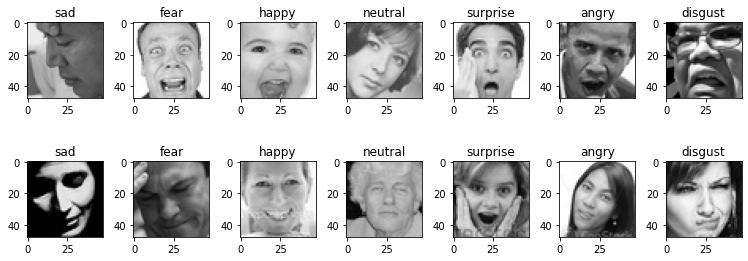

Pickle file saved in ..\data\pickle


In [3]:
train = create_dataset("../data/train")
train.load_images(verbose = 1)
train.normalize()
train.to_RGB()
train.to_np()
train.plots()

train.to_pickle("train")

# Load Test Dataset

Loading angry


100%|██████████| 958/958 [00:00<00:00, 5537.58it/s]


Loading disgust


100%|██████████| 111/111 [00:00<00:00, 4036.45it/s]


Loading fear


100%|██████████| 1024/1024 [00:00<00:00, 4120.68it/s]


Loading happy


100%|██████████| 1774/1774 [00:00<00:00, 3806.80it/s]


Loading neutral


100%|██████████| 1233/1233 [00:00<00:00, 4459.30it/s]


Loading sad


100%|██████████| 1247/1247 [00:00<00:00, 4329.86it/s]


Loading surprise


100%|██████████| 831/831 [00:00<00:00, 4694.99it/s]


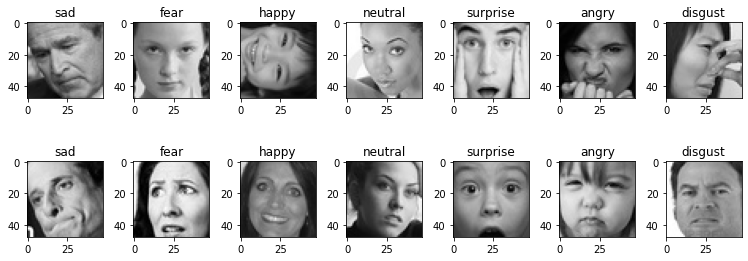

Pickle file saved in ..\data\pickle


In [6]:
test = create_dataset("../data/test/")
test.load_images(verbose = 1)
test.normalize()
test.to_RGB()
test.to_np()
test.plots()

test.to_pickle("test")